In [1]:
# %% load libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use("default")


In [2]:
# %% load dataset and create adjacency matrix and network
female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
dim = max(female.max(), male.max())+1
adj = np.zeros((dim,dim))
for i,j in zip(female,male):
    adj[i,j] = 1
    adj[j,i] = 1
net = nx.from_numpy_array(adj)


In [3]:
id_female = np.unique(female)
id_male   = np.unique(male)


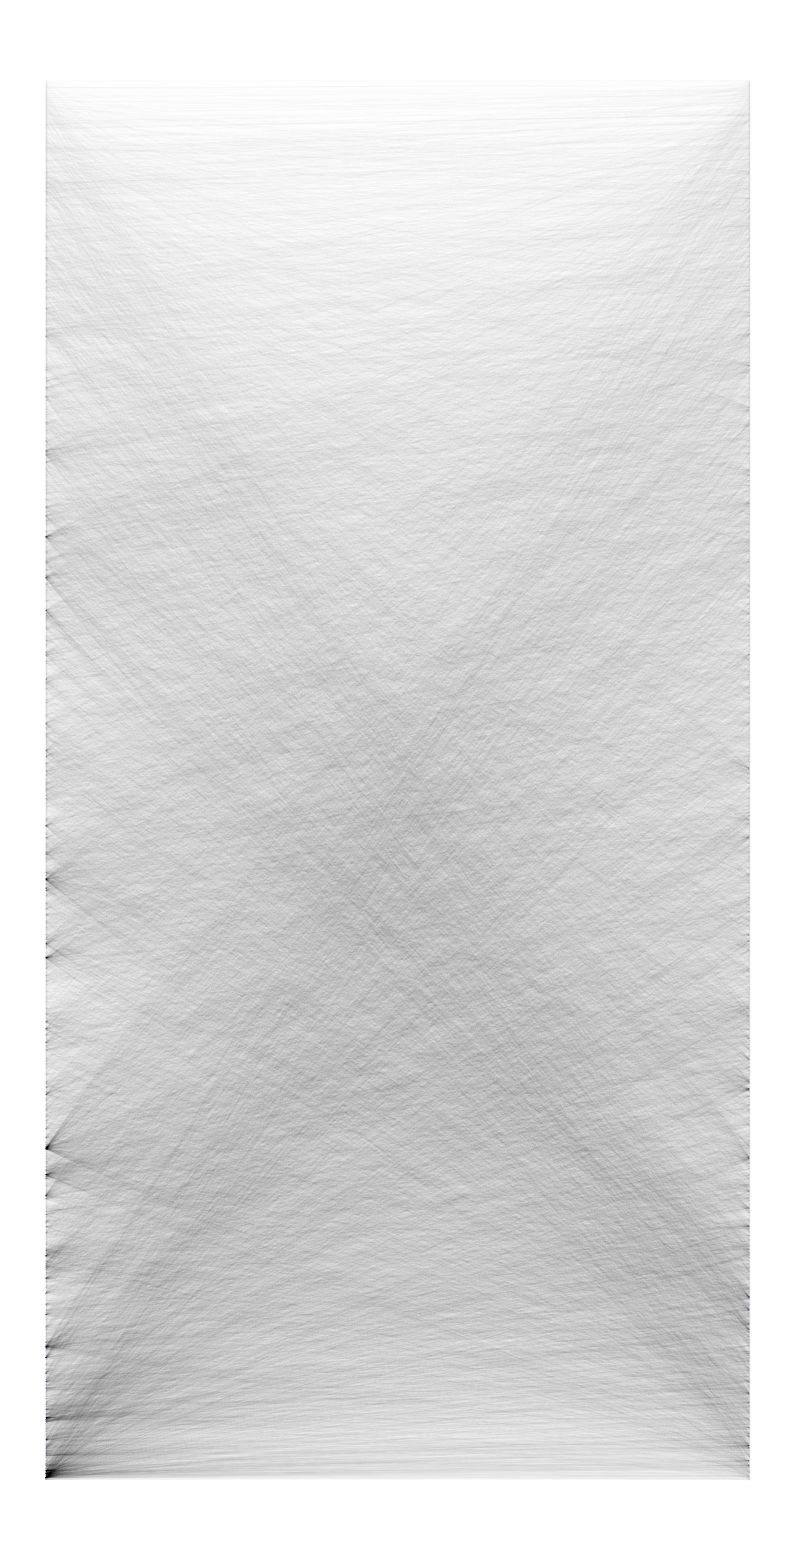

In [4]:
position = nx.bipartite_layout(net, nodes=female)
fig, ax = plt.subplots(figsize=(10,20))
nx.draw(net, ax=ax, pos=position, node_size=1, alpha=.005)


In [5]:
# %% number of males and females
print("{:10} = {:d}".format("# Female", len(np.unique(female))))
print("{:10} = {:d}".format("# Male"  , len(np.unique(male  ))))


# Female   = 6624
# Male     = 10106


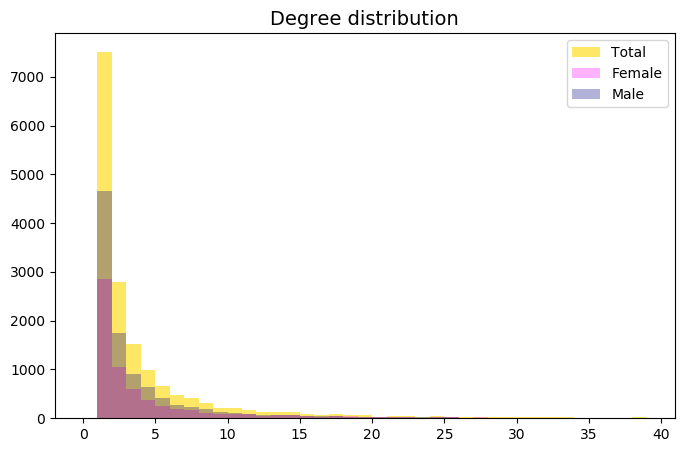

In [6]:
# %% degree distibution
deg = list(net.degree())
deg = np.array([x[1] for x in deg])
deg_female = deg[id_female]
deg_male   = deg[id_male]

fig, ax = plt.subplots(figsize=(8,5))
bins = [i for i in range(0,40)]
ax.hist(deg, bins=bins, alpha=.6, color="gold", label="Total")
ax.hist(deg_female, bins=bins, alpha=.3, color="fuchsia", label="Female")
ax.hist(deg_male, bins=bins, alpha=.3, color="navy", label="Male")
ax.set_title("Degree distribution", fontsize=14)
ax.legend()
plt.show()


In [7]:
ass = nx.degree_assortativity_coefficient(net)
print("Assortativity =", ass)



Assortativity = -0.10973635444115823


In [8]:
print("number of connected component:", nx.number_connected_components(net))


number of connected component: 418


In [9]:
link=net.number_of_edges()
node=net.number_of_nodes()
conn=link/(node*(node-1)/2)
print("connectivity =", conn)



connectivity = 0.0002790091060628706


In [10]:
# %% active links and nodes
active_male, active_female = [], []
tot_male_t, tot_female_t = [], []
current_time, number_link  = np.unique(time, return_counts=True)

for t in current_time:
    # active nodes
    active_male.append  (len(np.unique(male[time==t])))
    active_female.append(len(np.unique(female[time==t])))
    # total members in community
    tot_male_t  .append(len(np.unique(male  [time<=t])))
    tot_female_t.append(len(np.unique(female[time<=t])))


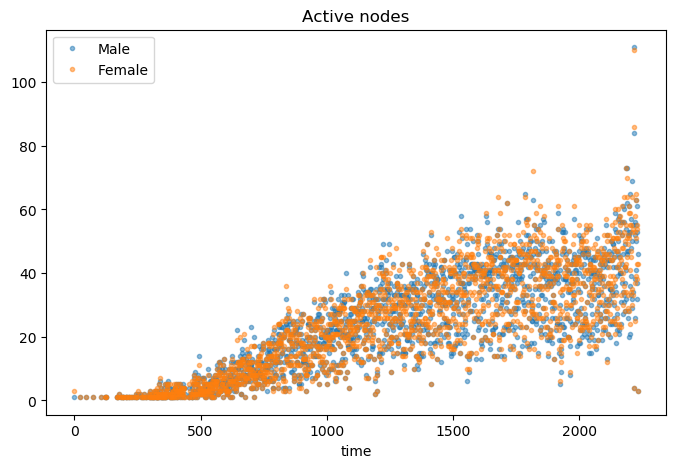

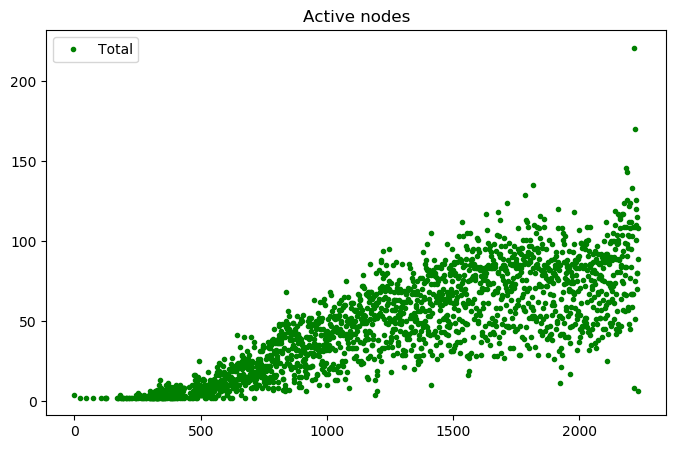

In [11]:
# %% Plot of active nodes
plt.figure(figsize=(8,5))
plt.title("Active nodes")
plt.plot(current_time, active_male  , ".", label="Male"  , alpha=.5)
plt.plot(current_time, active_female, ".", label="Female", alpha=.5)
plt.xlabel("time")
#plt.xlim(1000, 1050)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.title("Active nodes")
plt.plot(current_time, np.add(active_female, active_male), "g.",label="Total")
#plt.xlim(1000, 1050)
plt.legend()
plt.show()


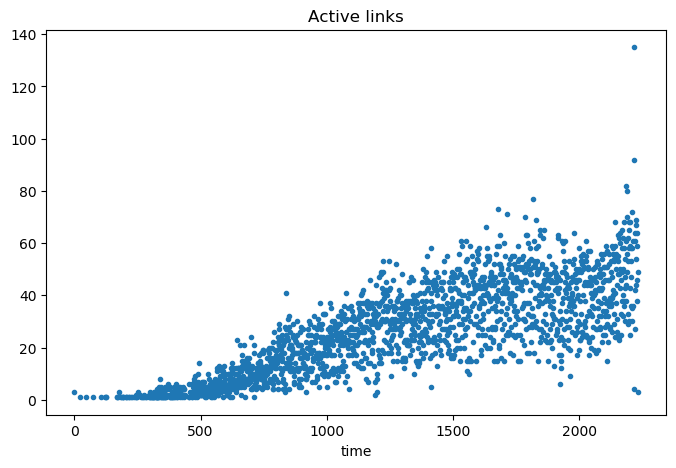

In [12]:
# %% Plot of active links
plt.figure(figsize=(8,5))
plt.title("Active links")
plt.plot(current_time, number_link, ".")
plt.xlabel("time")
plt.show()


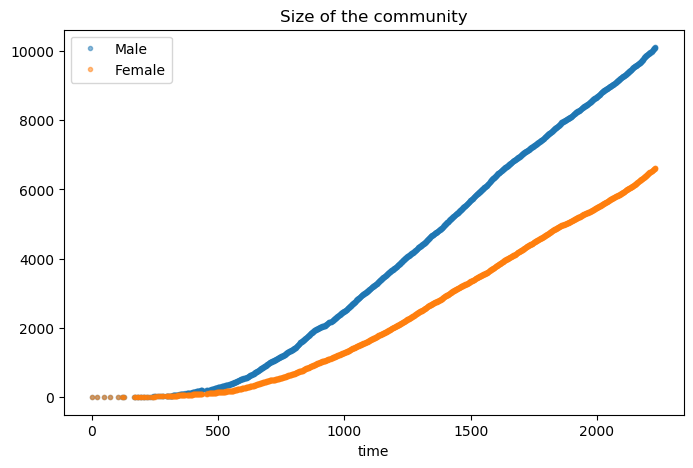

In [13]:
# %% size of the community
plt.figure(figsize=(8,5))
plt.title("Size of the community")
plt.plot(current_time, tot_male_t, "."  , label="Male"  , alpha=.5)
plt.plot(current_time, tot_female_t, ".", label="Female", alpha=.5)
plt.xlabel("time")
plt.legend()
plt.show()


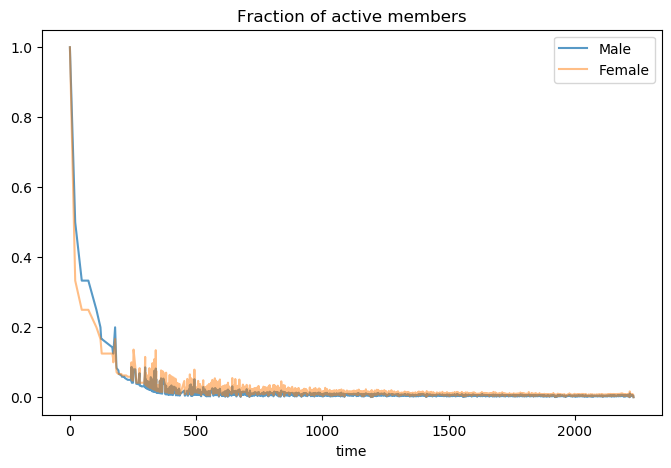

In [14]:
# %% fraction of active members in the community
plt.figure(figsize=(8,5))
plt.title("Fraction of active members")
plt.plot(current_time, np.divide(active_male, tot_male_t), "-", label="Male", alpha=.75)
plt.plot(current_time, np.divide(active_female, tot_female_t), "-", label="Female", alpha=.5)
plt.xlabel("time")
plt.legend()
plt.show()


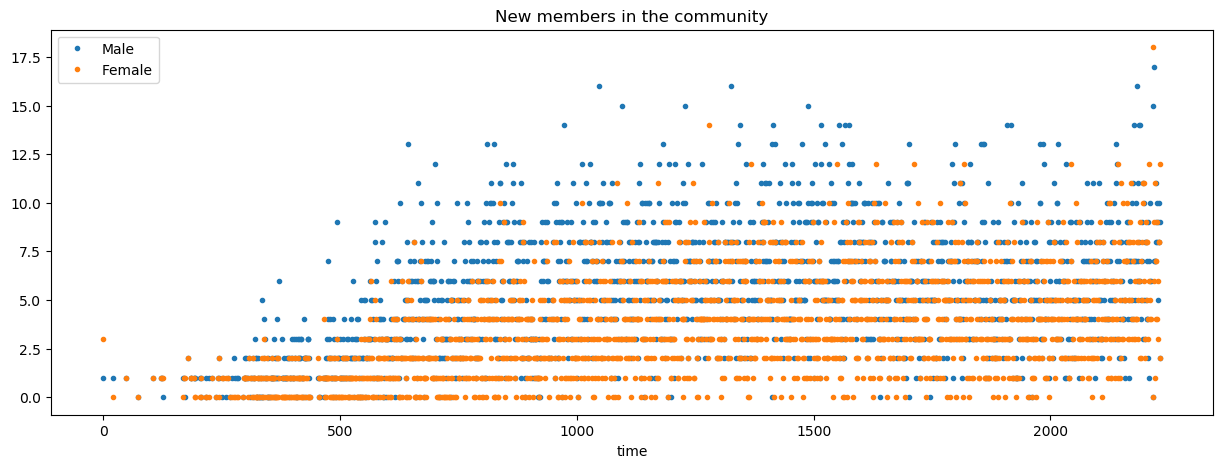

In [15]:
# %% new members in the community
plt.figure(figsize=(15,5))
plt.title("New members in the community")
plt.plot(current_time, np.diff(tot_male_t, prepend=0), "." , label="Male")
plt.plot(current_time, np.diff(tot_female_t, prepend=0), ".", label="Female")
plt.xlabel("time")
plt.legend()
plt.show()


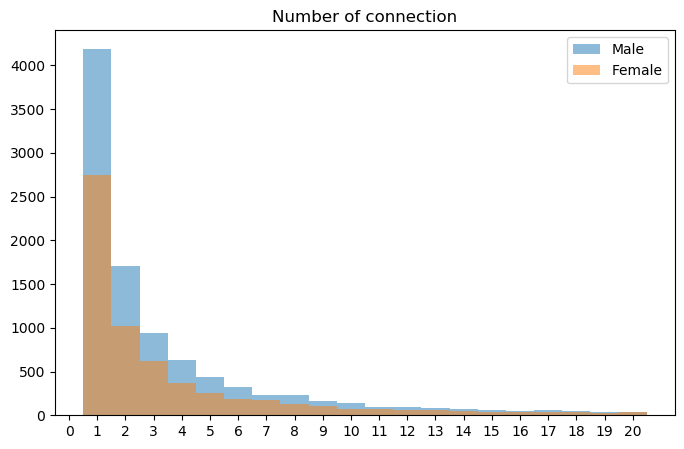

In [16]:
# %% number of connections for each node
_, male_activations   = np.unique(male  , return_counts=True)
_, female_activations = np.unique(female, return_counts=True)

plt.figure(figsize=(8,5))
plt.title("Number of connection")
plt.hist(male_activations,   bins=[i+0.5 for i in range(21)], alpha=0.5, label="Male")
plt.hist(female_activations, bins=[i+0.5 for i in range(21)], alpha=0.5, label="Female")
plt.xticks(range(21))
plt.legend()
plt.show()
